# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

#### Importar a Base de dados

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('advertising.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

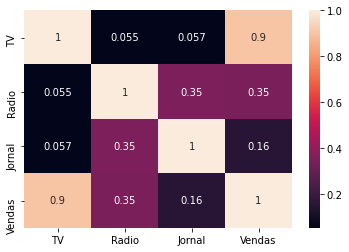

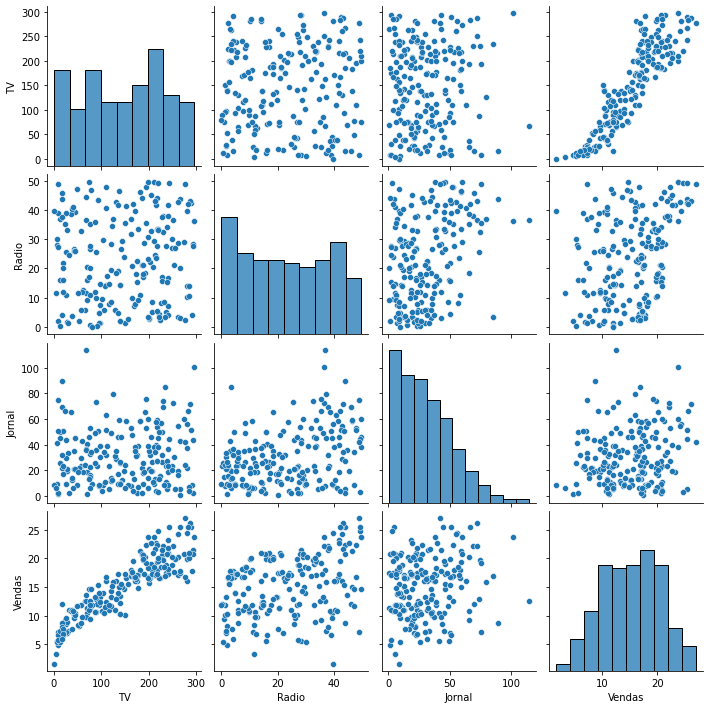

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(), annot = True)
plt.show()

sns.pairplot(df)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [11]:
from sklearn.model_selection import train_test_split

# Separar dados de X e de y
# y é quem a gente quer descobrir

y = df["Vendas"]

# x é o resto
x = df.drop("Vendas", axis = 1)

# dividir os dados
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [16]:
from sklearn.linear_model import LinearRegression

rl = LinearRegression()

rl.fit(x_treino, y_treino)

prev_rl = rl.predict(x_teste)

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_treino, y_treino)

prev_rf = rf.predict(x_teste)

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [18]:
from sklearn import metrics

print(metrics.r2_score(y_teste, prev_rl))
print(metrics.r2_score(y_teste, prev_rf))

# Random Forest é o modelo vencedor
# 0,96 > 0,90

0.904891724136168
0.969926711220591


#### Visualização Gráfica das Previsões

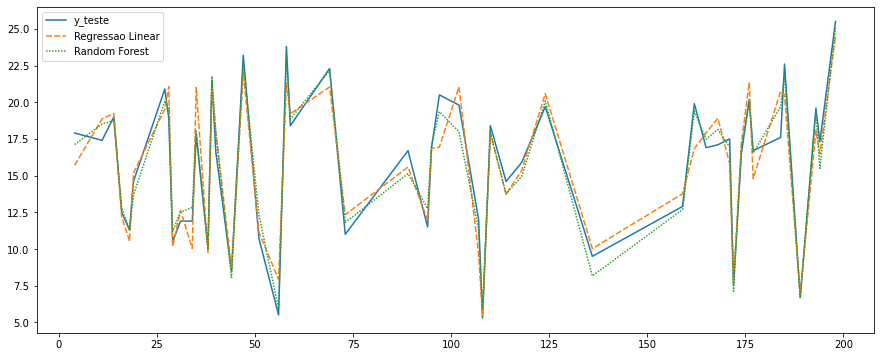

In [23]:
df_aux = pd.DataFrame()
df_aux["y_teste"] = y_teste
df_aux["Regressao Linear"] = prev_rl
df_aux["Random Forest"] = prev_rf

plt.figure(figsize=(15, 6))
sns.lineplot(data=df_aux)
plt.show()

#### Qual a importância de cada variável para as vendas?

<AxesSubplot:>

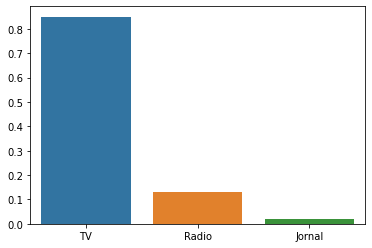

In [20]:
sns.barplot(x= x_treino.columns, y= rf.feature_importances_)